# How to create pkl file of the image dataset. 

In [121]:
# divide the data into training set, validation set and test set

totaldata = 120 # total number of samples 

# future plan is to use percentage 

training   = totaldata / 100 * 70 # 70%
validation = totaldata / 100 * 20 # 20%
testcnt    = totaldata / 100 * 10 # 10%

datafolder = 'imagedata'

# for color image channel is 3
# for gray image channel is 1

(height,width,channel) = (96,96,3)

import fnmatch
import os
import random 
try:
  import cPickle as pickle
except:
  import pickle

import re

import cv2
import numpy as np

Get the second level folder names as label and create a picklefile named labels.pkl

<pre>
./data |
       | - pothole
       | - personbike
       | - construction
</pre>

In the above example pohole, personbike, construction will be the labels sorted in lexicographical order ['construction','personbike','pothole']
The labels will be from 0 to len(list_dir) example, {'pothole': 2, 'personbike': 1, 'construction': 0}

In [122]:
keys = sorted(next(os.walk(datafolder))[1])
# remove the hidden key 
keys = filter(lambda x: not x.startswith('.'),keys)
values = range(0,len(keys))
labels = dict(zip(keys,values))
pickle.dump(labels,open('labels.pkl','wb'))

print 'Labels ',labels


Labels  {'pothole': 2, 'personbike': 1, 'construction': 0}


In [123]:
# find all the files and create a list inside data
# directory recursively
 
matches = []
for root, dirnames, filenames in os.walk(datafolder):
    for filename in fnmatch.filter(filenames, '*.*'):
        matches.append(os.path.join(root, filename))

l = len(matches)

print 'Total files ',l

Total files  120


Create a np variable which will hold the whole dataset 


In [124]:
train_set = np.empty(shape=(0, height * width * channel),dtype='uint8') 
valid_set = np.empty(shape=(0, height * width * channel),dtype='uint8') 
test_set  = np.empty(shape=(0, height * width * channel),dtype='uint8') 

train_lbl = np.ndarray(shape=(0,),dtype='uint8') 
valid_lbl = np.ndarray(shape=(0,),dtype='uint8') 
test_lbl  = np.ndarray(shape=(0,),dtype='uint8') 


Maintain a set to choose one file randomly and create vector out of it with corresponding labels. 


Populating the interactive namespace from numpy and matplotlib
Created test_set, validation_set and training_set


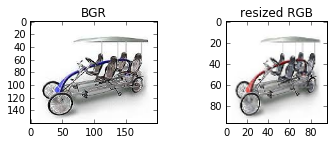

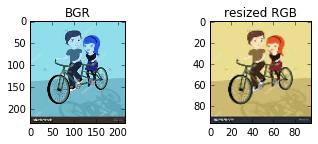

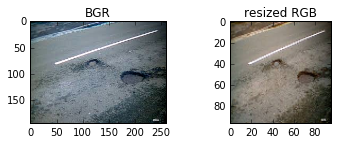

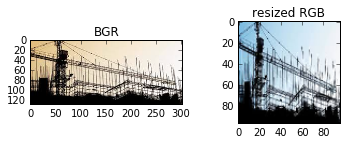

In [125]:
import matplotlib as plt
%pylab inline

count = 1
s = set(range(0,l))
while len(s) > 0:
    idx = random.choice(list(s))
    s.remove(idx)

    # randomly picked up the files, now create 1 X (height * width * channel) ndarray, 1X1 label
    filename = matches[idx]
    lbl = re.search('\/(.*)\/',filename).group(1)
    label = labels[ lbl ]

    #this is BGR image, convert to RGB 
    bgrimg = cv2.imread(filename)   
 
    #this is RGB
    rgbimg = cv2.cvtColor(bgrimg, cv2.COLOR_BGR2RGB)

    #resize to required size (aspect ration not maintained)
    res = cv2.resize(rgbimg,(width, height), interpolation = cv2.INTER_CUBIC)

    if count < 5:
        plt.figure(count)
        plt.subplot(221)
        plt.title('BGR')
        plt.imshow(bgrimg)  
        plt.subplot(222)
        plt.title('resized RGB')
        plt.imshow(res)
   

    reshaped = np.reshape(res,height * width *channel)
    #array = np.append(parray,label)
    if training > 0:
        train_set = np.append(train_set, [reshaped], axis=0)
        train_lbl = np.append(train_lbl, [label]   , axis=0)
        training = training - 1
    elif training <= 0 and validation > 0:
        valid_set = np.append(valid_set, [reshaped], axis=0)
        valid_lbl = np.append(valid_lbl, [label]   , axis=0)
        validation = validation - 1
    elif validation <= 0 and testcnt > 0:
        test_set = np.append(test_set,   [reshaped], axis=0)
        test_lbl = np.append(test_lbl,   [label]   , axis=0)
        testcnt = testcnt - 1
    else:
        break   

    count = count + 1

print 'Created test_set, validation_set and training_set'

In [126]:
if (train_set.all() != None): print train_set.shape 
if (valid_set.all() != None): print valid_set.shape  
#if (test_set.all()  != None): print test_set.shape

if (train_set.all() != None): print train_lbl.shape 
if (valid_set.all() != None): print valid_lbl.shape 
#if (test_set.all()  != None): print test_lbl.shape  


(70, 27648)
(30, 27648)
(70,)
(30,)


In [127]:
tn = (train_set,train_lbl)
vl = (valid_set,valid_lbl)
ts = (test_set,test_lbl)
      
pickle.dump((tn,vl,ts),open('wys_data.pkl','wb'),protocol=pickle.HIGHEST_PROTOCOL)


In [128]:
# this is an example function to load the pkl data file 
def load_WYS_file(filename):
    '''Load a single file of WYS'''
    with open(filename, 'rb') as f:
        datadict= pickle.load(f)
        (X_train,Y_train),(X_valid,Y_valid),(X_test,Y_test) = datadict
        train_S = X_train.shape[0]
        X_train = X_train.astype('uint8')
        Y_train = np.array(Y_train).astype('uint8')
        test_S  = X_test.shape[0]  #number of rows in test set
        X_test = X_test.astype('uint8')
        Y_test = np.array(Y_test).astype('uint8')


        #combine all together
        X_train = np.vstack((X_train,X_valid))
        X_train = np.vstack((X_train,X_test))

        Y_train = np.concatenate((Y_train,Y_valid))
        Y_train = np.concatenate((Y_train,Y_test))


        return (X_train, Y_train) 




In [129]:
X, y = load_WYS_file('wys_data.pkl')

In [130]:
print X.shape
print y.shape


(100, 27648)
(100,)


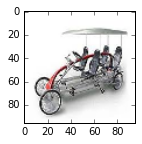

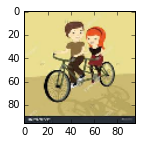

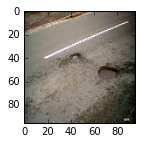

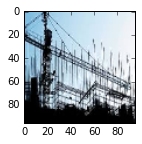

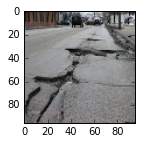

In [131]:
for i in range(0, 5):
    plt.figure(num=i,figsize=(2, 2))
    img = reshape(X[[i]],(height,width,channel))
    plt.imshow(img)  
   